## Final

In [2]:
# Dependencies
import json
import requests as req
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from census import Census
from states import states, states_hash, states_loc
from passwords import census_key, google_key, plotly_user, plotly_key
from NCMEC_parser import NCMEC_parser

### Pulling Data from NCMEC

In [3]:
# NCMEC website parser by state - NCMEC_parser.py
# for state in states:
#     NCMEC_parser(state)

### Combining and Cleaning NCMEC Data

In [4]:
# # combining data by state in to one df
# df = pd.DataFrame(columns = ['name','age','gender','ethnicity','NCMEC_case#','case_type','birth_year','missing_year','missing_city','missing_county','missing_state'])

# index = 0
# for state in states:
#     state_df = pd.read_csv('Resources/NCMEC_{}.csv'.format(state))
#     for i in range(len(state_df)):
#         df.set_value(index,'name',state_df['name'][i])
#         df.set_value(index,'age',state_df['age'][i])
#         df.set_value(index,'gender',state_df['gender'][i])
#         df.set_value(index,'ethnicity',state_df['ethnicity'][i])
#         df.set_value(index,'NCMEC_case#',state_df['NCMEC_case#'][i])
#         df.set_value(index,'case_type',state_df['case_type'][i])
#         df.set_value(index,'birth_year',state_df['birth_year'][i])
#         df.set_value(index,'missing_year',state_df['missing_year'][i])
#         df.set_value(index,'missing_city',state_df['missing_city'][i])
#         df.set_value(index,'missing_county',state_df['missing_county'][i])
#         df.set_value(index,'missing_state',states[state])
#         index += 1
# df

In [5]:
# # cleaning combined NCMEC data for 50 states
# df['age'] = df['age'].replace(-1,float('NaN'))
# df['gender'] = df['gender'].replace('unknown',float('NaN'))
# df['ethnicity'] = df['ethnicity'].replace('unknown',float('NaN'))
# df['ethnicity'] = df['ethnicity'].replace('amInd','native american')
# df['ethnicity'] = df['ethnicity'].replace(['blackHisp','whiteHisp'],'hispanic')
# df['case_type'] = df['case_type'].replace(['unidentified','unknown'],float('NaN'))
# df['case_type'] = df['case_type'].replace('endangeredRunaway','runaway')
# df['case_type'] = df['case_type'].replace(['Section 5779','endangeredMissing','lostInjuredMissing'],'missing')
# df['case_type'] = df['case_type'].replace(['familyAbduct','hagueCase','nonFamilyAbduct'],'abduct')
# df.head()

In [6]:
# finding latitude and longitude for missing city,state
# for i in range(len(df)):
#     try:
#         gkey = google_key
#         target_city = "{}, {}".format(df['missing_city'][i],df['missing_state'][i])
#         target_url = "https://maps.googleapis.com/maps/api/geocode/json?address={}&key={}".format(target_city, gkey)
#         geo_data = req.get(target_url).json()
#         lat = geo_data["results"][0]["geometry"]["location"]["lat"]
#         lng = geo_data["results"][0]["geometry"]["location"]["lng"]
#         print("location: {} lat: {} lng: {}".format(target_city,lat,lng))
#     except:
#         print("{} fail".format(i))
#         break
         


In [7]:
#df.to_csv("Resources/_NCMEC_final.csv", encoding="utf-8", index=False)

### Missing Peoples Ratio - # of Missing People vs State Population

In [8]:
# Census API Key
c = Census(census_key)

# Read Main CSV
df_NCMEC = pd.read_csv("NCMEC_final.csv")
df_NCMEC.head()

,name,age,gender,ethnicity,NCMEC_case#,case_type,birth_year,missing_year,missing_city,missing_county,missing_state
0,DANIEL BARTER,62.0,male,white,600229,missing,1954,1959,PERDIDO BAY,Baldwin County,Alabama
1,CHRISTINA CARTER,47.0,female,white,1084835,missing,1970,1973,HUEYTOWN,Sevier County,Alabama
2,CARLA CORLEY,51.0,female,white,765111,abduct,1965,1980,BIRMINGHAM,Jefferson County,Alabama
3,SHERRY MARLER,46.0,female,white,601811,missing,1971,1984,GREENVILLE,Butler County,Alabama
4,MARY JO BURNETT,49.0,female,white,869473,missing,1967,1985,ROCKFORD,Coosa County,Alabama


In [9]:
c = Census("5e99f22848e97d5bcc53f03a358b973493473cd9")
cKey = "5e99f22848e97d5bcc53f03a358b973493473cd9"

url1 = "https://api.census.gov/data/2014/pep/natstprc?get=STNAME,POP&for=state:*&DATE=7"
reqUrl1 = url1 + "&key="+ cKey
getData1 = req.get(reqUrl1).json()

In [10]:
# State level dataframe
df_states = pd.DataFrame(getData1,columns=getData1[0])
df_states = df_states.drop(df_states.index[0])
df_states['POP'] =  list(map(int,df_states['POP']))
df_states = df_states.drop('DATE', 1)
df_states = df_states[df_states.STNAME != 'District of Columbia']
df_states = df_states[df_states.STNAME != 'Puerto Rico Commonwealth']
df_states = df_states.reset_index(drop = True)
df_states['state_key'] = [states_hash[state] for state in list(df_states['STNAME'])]
df_states['Miss_Pop'] = list(df_NCMEC.groupby('missing_state').count()['name'])
# Devided population by 1 million for a better ratio between missing peoples and population
df_states['Miss%'] = round(df_states['Miss_Pop']/df_states['POP'] * 1000000,2)

df_states

,STNAME,POP,state,state_key,Miss_Pop,Miss%
0,Alabama,4849377,01,AL,35,7.22
1,Alaska,736732,02,AK,12,16.29
2,Arizona,6731484,04,AZ,104,15.45
3,Arkansas,2966369,05,AR,37,12.47
4,California,38802500,06,CA,557,14.35
5,Colorado,5355866,08,CO,86,16.06
6,Connecticut,3596677,09,CT,24,6.67
7,Delaware,935614,10,DE,9,9.62
8,Florida,19893297,12,FL,327,16.44
9,Georgia,10097343,13,GA,87,8.62


In [11]:
url2 = "https://api.census.gov/data/2015/acs1?get=NAME,B19013_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,B02001_009E,B02001_010E&for=state:*"
reqUrl2 = url2 + "&key="+ cKey
getData2 = req.get(reqUrl2).json()

In [12]:
df_temp = pd.DataFrame(getData2, columns=getData2[0])
df_temp = df_temp.drop(df_temp.index[0])
df_temp = df_temp.drop('state', 1)

df_temp = df_temp.rename(columns={"B19013_001E": "Household Income", 
                                      "B02001_002E": "Whites", 
                                      "B02001_003E": "African Americans",
                                      "B02001_004E": "American Indians",
                                      "B02001_005E": "Asians",
                                      "B02001_006E": "Pacific Islanders",
                                      "B02001_007E": "Others",
                                      "B02001_008E": "Two or More Races",
                                      "B02001_009E": "Two or More Inc Others",
                                      "B02001_010E": "Two or More Excl Others",
                                      "NAME": "STNAME" })

df_temp = df_temp[df_temp.STNAME != 'District of Columbia']
df_temp = df_temp[df_temp.STNAME != 'Puerto Rico Commonwealth']
df_temp = df_temp[df_temp.STNAME != 'Puerto Rico']
df_temp = df_temp.reset_index(drop = True)
df_temp

,STNAME,Household Income,Whites,African Americans,American Indians,Asians,Pacific Islanders,Others,Two or More Races,Two or More Inc Others,Two or More Excl Others
0,Alabama,44765,3329913,1303298,20503,59393,4448,54105,87319,6354,80965
1,Alaska,73355,481314,26176,101133,47295,6762,12467,63285,3171,60114
2,Arizona,51492,5285994,300685,308469,217556,11284,481631,222446,45251,177195
3,Arkansas,41995,2308047,469555,20797,42404,7639,65542,64220,6149,58071
4,California,64500,23824254,2277229,282777,5548936,157554,5300297,1753771,375682,1378089
5,Colorado,63909,4607390,224809,49138,162880,9136,209890,193331,30981,162350
6,Connecticut,71346,2747943,380571,8893,156249,519,180107,116604,28025,88579
7,Delaware,61255,654904,203863,3121,36114,334,19157,28441,3500,24941
8,Florida,49426,15357374,3280778,47032,544068,11898,528266,501856,87649,414207
9,Georgia,51244,6077438,3197929,28491,388457,4337,284084,234124,36148,197976


In [13]:
df_states = df_states.merge(df_temp, on='STNAME')

In [14]:
# Clean data and add ethnic percentages
df_states['Whites'] = list(map(int,df_states['Whites']))
df_states['Whites%'] = round(df_states['Whites']/df_states['POP']*100, 2)
df_states['African Americans'] = list(map(int,df_states['African Americans']))
df_states['African Americans%'] = round(df_states['African Americans']/df_states['POP']*100, 2)
df_states['American Indians'] = list(map(int,df_states['American Indians']))
df_states['American Indians%'] = round(df_states['American Indians']/df_states['POP']*100, 2)
df_states['Asians'] = list(map(int,df_states['Asians']))
df_states['Asians%'] = round(df_states['Asians']/df_states['POP']*100, 2)
df_states['Pacific Islanders'] = list(map(int,df_states['Pacific Islanders']))
df_states['Pacific Islanders%'] = round(df_states['Pacific Islanders']/df_states['POP']*100, 2)
df_states['Others'] = list(map(int,df_states['Others']))
df_states['Others%'] = round(df_states['Others']/df_states['POP']*100, 2)
df_states.rename(columns={'Two or More Races': 'BiRacial','Two or More Inc Others': 'BiRacial Incl Others','Two or More Excl Others':'BiRacial Excl Others'}, inplace=True)
df_states['BiRacial'] = list(map(int,df_states['BiRacial']))
df_states['BiRacial%'] = round(df_states['BiRacial']/df_states['POP']*100, 2)
df_states['BiRacial Incl Others'] = list(map(int,df_states['BiRacial Incl Others']))
df_states['BiRacial Excl Others'] = list(map(int,df_states['BiRacial Excl Others']))

'''
Gender + Education level Data if possible
'''

df_states

,STNAME,POP,state,state_key,Miss_Pop,Miss%,Household Income,Whites,African Americans,American Indians,...,BiRacial,BiRacial Incl Others,BiRacial Excl Others,Whites%,African Americans%,American Indians%,Asians%,Pacific Islanders%,Others%,BiRacial%
0,Alabama,4849377,01,AL,35,7.22,44765,3329913,1303298,20503,...,87319,6354,80965,68.67,26.88,0.42,1.22,0.09,1.12,1.80
1,Alaska,736732,02,AK,12,16.29,73355,481314,26176,101133,...,63285,3171,60114,65.33,3.55,13.73,6.42,0.92,1.69,8.59
2,Arizona,6731484,04,AZ,104,15.45,51492,5285994,300685,308469,...,222446,45251,177195,78.53,4.47,4.58,3.23,0.17,7.15,3.30
3,Arkansas,2966369,05,AR,37,12.47,41995,2308047,469555,20797,...,64220,6149,58071,77.81,15.83,0.70,1.43,0.26,2.21,2.16
4,California,38802500,06,CA,557,14.35,64500,23824254,2277229,282777,...,1753771,375682,1378089,61.40,5.87,0.73,14.30,0.41,13.66,4.52
5,Colorado,5355866,08,CO,86,16.06,63909,4607390,224809,49138,...,193331,30981,162350,86.03,4.20,0.92,3.04,0.17,3.92,3.61
6,Connecticut,3596677,09,CT,24,6.67,71346,2747943,380571,8893,...,116604,28025,88579,76.40,10.58,0.25,4.34,0.01,5.01,3.24
7,Delaware,935614,10,DE,9,9.62,61255,654904,203863,3121,...,28441,3500,24941,70.00,21.79,0.33,3.86,0.04,2.05,3.04
8,Florida,19893297,12,FL,327,16.44,49426,15357374,3280778,47032,...,501856,87649,414207,77.20,16.49,0.24,2.73,0.06,2.66,2.52
9,Georgia,10097343,13,GA,87,8.62,51244,6077438,3197929,28491,...,234124,36148,197976,60.19,31.67,0.28,3.85,0.04,2.81,2.32


In [15]:
# Plotly Info
py.tools.set_credentials_file(plotly_user, plotly_key)
init_notebook_mode(connected=True)

In [16]:
# Changing everything to strings
df_graph1 = df_states
for col in df_graph1.columns:
    df_graph1[col] = df_graph1[col].astype(str)

# Color Scale
scl = [[0.0, 'rgb(0,255,0)'],[0.2, 'rgb(100,255,0)'],[0.4, 'rgb(222,255,0)'],\
            [0.6, 'rgb(255,222,0)'],[0.8, 'rgb(255,100,0)'],[1.0, 'rgb(255,0,0)']]

# text overlay for states
df_graph1['text'] = "---" + df_graph1['STNAME'] + "---" + '<br>'\
            "Missing: " + df_graph1['Miss_Pop'] + '<br>'\
            "Population: " + df_graph1['POP'] + '<br>'\
            "Average Income: $" + df_graph1['Household Income'] + '<br>'\
            "---" + "Race%" + "---" + '<br>'\
            "White: "+df_graph1['Whites%']+"% "+"Black: "+df_graph1['African Americans%']+"% "+":Native American: "+df_graph1['American Indians%']+"% "+"Asian: "+df_graph1['Asians%'] +"%" + '<br>'\
            "Pacific Islander: "+df_graph1['Pacific Islanders%']+"% "+"BiRacial: "+df_graph1['BiRacial%']+"% "+"Other: "+df_graph1['Others%']+"%"

# Bunch of fancy settings for the plot
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_graph1['state_key'],
        z = df_graph1['Miss%'].astype(float),
        locationmode = 'USA-states',
        text = df_graph1['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Ratio Scale")
        ) ]

# Plot layout
layout = dict(
        title = '# of Disapperances vs State Population<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data, layout=layout )
plot(fig, filename='Outputs/0_DisappearanceRatio.html')

'file://C:\\Users\\jamie\\Desktop\\DoctorsofData\\Outputs\\0_DisappearanceRatio.html'

### Trend By Decade

In [17]:
'''
<80s
90s
00s
10s>
plot on US MAP 
options:
1. dots by lat,lng https://plot.ly/python/scatter-plots-on-maps/
    a. slider https://plot.ly/python/sliders/
2. bubble grows bigger by decade https://plot.ly/python/bubble-maps/
'''

'\n<80s\n90s\n00s\n10s>\nplot on US MAP \noptions:\n1. dots by lat,lng https://plot.ly/python/scatter-plots-on-maps/\n    a. slider https://plot.ly/python/sliders/\n2. bubble grows bigger by decade https://plot.ly/python/bubble-maps/\n'

In [18]:
df_80 = df_NCMEC.loc[df_NCMEC['missing_year'] < 1980].groupby('missing_state').count()['name']
df_90 = df_NCMEC.loc[df_NCMEC['missing_year'] < 1990].groupby('missing_state').count()['name']
df_00 = df_NCMEC.loc[df_NCMEC['missing_year'] < 2000].groupby('missing_state').count()['name']
df_10 = df_NCMEC.loc[df_NCMEC['missing_year'] < 2010].groupby('missing_state').count()['name']
df_17 = df_NCMEC.groupby('missing_state').count()['name']

df_decades = pd.DataFrame(columns = ['1980','1990','2000','2010','2017'],index = states_hash)

for i in range(len([df_80,df_90, df_00, df_10, df_17])):
    for state in list(df_decades.index):
        try:
            df_decades.set_value(state,'1980',df_80[state])
        except:
            pass
        try:
            df_decades.set_value(state,'1990',df_90[state])
        except:
            pass
        try:
            df_decades.set_value(state,'2000',df_00[state])
        except:
            pass
        try:
            df_decades.set_value(state,'2010',df_10[state])
        except:
            pass
        try:
            df_decades.set_value(state,'2017',df_17[state])
        except:
            pass
df_decades = df_decades.fillna(0)

df_coord = pd.DataFrame(states_loc)
df_coord.sort_values(['state'], ascending = True)
df_decades['state'] = list(df_decades.index)
df_decades = df_decades.merge(df_coord,on='state')
df_decades

,1980,1990,2000,2010,2017,state,latitude,longitude
0,2,6,10,12,35,Alabama,32.7990,-86.8073
1,3,4,7,7,12,Alaska,61.3850,-152.2683
2,7,14,26,51,104,Arizona,33.7712,-111.3877
3,1,5,9,12,37,Arkansas,34.9513,-92.3809
4,40,83,132,213,557,California,36.1700,-119.7462
5,2,13,17,23,86,Colorado,39.0646,-105.3272
6,6,8,12,15,24,Connecticut,41.5834,-72.7622
7,1,2,3,4,9,Delaware,39.3498,-75.5148
8,20,45,67,109,327,Florida,27.8333,-81.7170
9,2,10,19,34,87,Georgia,32.9866,-83.6487


In [19]:
df_80 = df_decades[['1980','state','latitude','longitude']]
df_80 = df_80.rename(columns={'1980':'missing_count'})
df_90 = df_decades[['1990','state','latitude','longitude']]
df_90 = df_90.rename(columns={'1990':'missing_count'})
df_00 = df_decades[['2000','state','latitude','longitude']]
df_00 = df_00.rename(columns={'2000':'missing_count'})
df_10 = df_decades[['2010','state','latitude','longitude']]
df_10 = df_10.rename(columns={'2010':'missing_count'})
df_17 = df_decades[['2017','state','latitude','longitude']]
df_17 = df_17.rename(columns={'2017':'missing_count'})
df_decades_long = pd.concat([df_80,df_90,df_00,df_10,df_17])
df_decades_long['text'] = ['{}<br>{} missing'.format(df_decades_long['state'].iloc[i],df_decades_long['missing_count'].iloc[i]) for i in range(len(df_decades_long))]
decade_years = ['1980','1990','2000','2010','2017']

limits = [(0,50),(50,100),(100,150),(150,200),(200,250)]
colors = ["rgb(40,116,217)","rgb(155,200,40)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)"]
decades = []

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df_decades_long[lim[0]:lim[1]]
    decade = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['missing_count']*3,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = '{}'.format(decade_years[i]) )
    decades.append(decade)

layout = dict(
        title = 'NCMEC Database Growth By State Each Decade<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        )

fig = dict( data=decades, layout=layout )
plot( fig, validate=False, filename='Outputs/1_DatabaseDecadeGrowth.html' )

'file://C:\\Users\\jamie\\Desktop\\DoctorsofData\\Outputs\\1_DatabaseDecadeGrowth.html'

### Top 3 Population vs Bottom 3 Population

In [20]:
# Create data for top 3 states
# Top 3 states and FIPS are: CA=06, TX=48,FL=12
# contruct URL for API
url3 = "https://api.census.gov/data/2015/acs1?get=NAME"
varList=",B01003_001E,B19013_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,B02001_009E,B02001_010E,B06009_001E,B06009_003E,B06009_004E,B06009_005E,B06009_006E"
cond="&for=county:*&in=state:06"
reqUrl3 = url3 + varList + cond + "&key="+ cKey
getData3 = req.get(reqUrl3).json()
df_CA = pd.DataFrame(getData3, columns=getData3[0])
df_CA = df_CA.drop(df_CA.index[0])

# getIncData["Total Ethnic"] =  int (getIncData["B02001_002E"]) + int (getIncData["B02001_003E"]) +int (getIncData["B02001_004E"]) + int (getIncData["B02001_005E"]) + int (getIncData["B02001_006E"]) + int (getIncData["B02001_007E"]) + int (getIncData["B02001_008E"]) + int (getIncData["B02001_009E"]) + int (getIncData["B02001_010E"])
df_CA = df_CA.rename(columns={"B19013_001E": "Household Income", 
                                      "B01003_001E": 'Population',
                                      "B02001_002E": "Whites", 
                                      "B02001_003E": "African Americans",
                                      "B02001_004E": "American Indians",
                                      "B02001_005E": "Asians",
                                      "B02001_006E": "Pacific Islanders",
                                      "B02001_007E": "Others",
                                      "B02001_008E": "Two or More Races",
                                      "B02001_009E": "Two or More Inc Others",
                                      "B02001_010E": "Two or More Excl Others",
                                      "B06009_001E": "Education Level Overall",
                                      "B06009_002E": "Less Than High School", 
                                      "B06009_003E": "High School Grads",
                                      "B06009_004E": "Some College Degree",
                                      "B06009_005E": "Bachelors Degree",
                                      "B06009_006E": "Grad or Pro Degree",
                                      "NAME": "Count/State" })
df_CA['county_name'] = [county.split(', California')[0] for county in df_CA['Count/State']]
df_CA['Household Income'] = list(map(int,df_CA['Household Income']))
df_CA['Population'] = list(map(int,df_CA['Population']))
df_CA['Bachelors Degree'] = list(map(int,df_CA['Bachelors Degree']))
df_CA['Grad or Pro Degree'] = list(map(int,df_CA['Grad or Pro Degree']))

In [21]:
df_NCMEC_CA = df_NCMEC.loc[df_NCMEC['missing_state']=='California']
df_CA_Missing = pd.DataFrame(df_NCMEC_CA.groupby('missing_county').count()['name']).reset_index()
df_CA_Missing.columns = ['county_name','missing_people']
df_CA_final = df_CA.merge(df_CA_Missing, on='county_name')
df_CA_final['4yrs_or_higher%'] = round((df_CA_final['Bachelors Degree'] + df_CA_final['Grad or Pro Degree'])/df_CA_final['Population']*100,2)
df_CA_final['missing_people_ratio'] = round(df_CA_final['missing_people']/df_CA_final['Population']*1000000,2)
df_CA_final

,Count/State,Population,Household Income,Whites,African Americans,American Indians,Asians,Pacific Islanders,Others,Two or More Races,...,High School Grads,Some College Degree,Bachelors Degree,Grad or Pro Degree,state,county,county_name,missing_people,4yrs_or_higher%,missing_people_ratio
0,"Alameda County, California",1638215,81717,701135,180957,10588,474507,14524,157558,98946,...,207825,278310,299391,217724,06,001,Alameda County,9,31.57,5.49
1,"Butte County, California",225411,45644,186531,2581,3154,10559,331,9240,13015,...,30850,57774,29188,11377,06,007,Butte County,1,18.00,4.44
2,"Contra Costa County, California",1126745,83104,639657,100354,6112,182666,6127,124324,67505,...,137662,236923,194193,115141,06,013,Contra Costa County,9,27.45,7.99
3,"El Dorado County, California",184452,79019,162276,1472,1608,7301,199,3801,7795,...,29712,49801,27607,16247,06,017,El Dorado County,1,23.78,5.42
4,"Fresno County, California",974861,46949,630159,46705,9346,99606,1950,153441,33654,...,138164,187697,75789,37701,06,019,Fresno County,5,11.64,5.13
5,"Humboldt County, California",135727,40484,108203,1712,6951,4475,97,7056,7233,...,20210,35249,15653,9010,06,023,Humboldt County,3,18.17,22.10
6,"Imperial County, California",180191,40852,126599,5113,2557,3377,104,36062,6379,...,23264,33910,10173,5487,06,025,Imperial County,3,8.69,16.65
7,"Kern County, California",882176,51342,684691,50286,7248,40891,2185,69878,26997,...,153819,148123,57137,28353,06,029,Kern County,10,9.69,11.34
8,"Kings County, California",150965,45746,99811,9167,2316,7163,754,26474,5280,...,22123,30324,10273,4663,06,031,Kings County,3,9.89,19.87
9,"Lake County, California",64591,37294,50558,1005,2395,483,230,7631,2289,...,16748,17355,4356,1483,06,033,Lake County,1,9.04,15.48


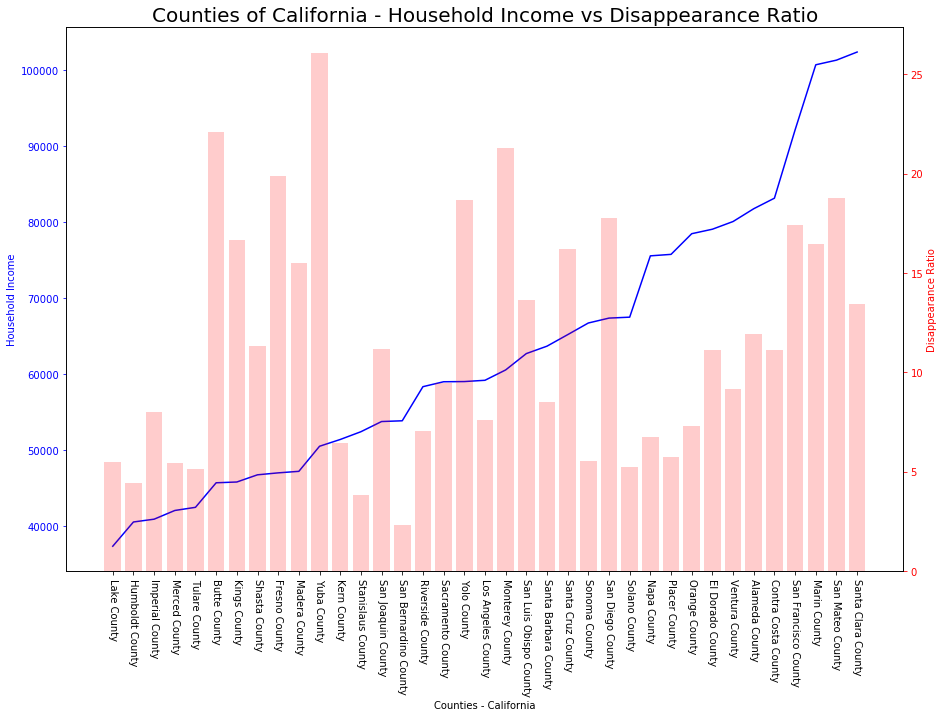

In [45]:
df_CA_Income = df_CA_final.sort_values(["Household Income"], ascending = True)

fig, ax1 = plt.subplots(figsize=(15,10))
x_axis = range(len(df_CA_Income['county_name']))
plt.xticks(x_axis, df_CA_Income['county_name'],rotation=-90)

s1 = df_CA_Income['Household Income']
ax1.plot(x_axis, s1, 'b-')
ax1.set_xlabel('Counties - California')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Household Income', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = df_CA_final['missing_people_ratio']
ax2.bar(x_axis, s2,color='r',alpha=0.2)
ax2.set_ylabel('Disappearance Ratio', color='r')
ax2.tick_params('y', colors='r')

plt.title('Counties of California - Household Income vs Disappearance Ratio',fontsize= 20)
plt.savefig("Outputs/2a_CA_income")
plt.show()

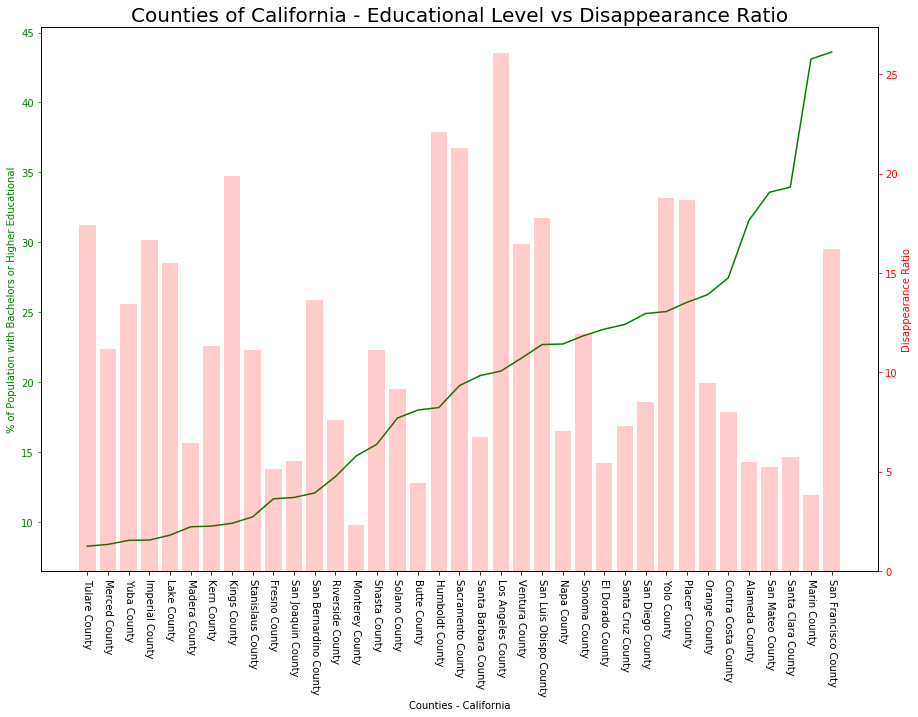

In [23]:
df_CA_Edu = df_CA_final.sort_values(["4yrs_or_higher%"], ascending = True)

fig, ax1 = plt.subplots(figsize=(15,10))
x_axis = range(len(df_CA_Edu['county_name']))
plt.xticks(x_axis, df_CA_Edu['county_name'],rotation=-90)

s1 = df_CA_Edu['4yrs_or_higher%']
ax1.plot(x_axis, s1, 'g-')
ax1.set_xlabel('Counties - California')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('% of Population with Bachelors or Higher Educational', color='g')
ax1.tick_params('y', colors='g')

ax2 = ax1.twinx()
s2 = df_CA_Edu['missing_people_ratio']
#round(df_states['Miss_Pop']/df_states['POP'] * 1000000,2)
ax2.bar(x_axis, s2,color='r',alpha=0.2)
ax2.set_ylabel('Disappearance Ratio', color='r')
ax2.tick_params('y', colors='r')

plt.title('Counties of California - Educational Level vs Disappearance Ratio',fontsize= 20)
plt.savefig("Outputs/2b_CA_education")
plt.show()

In [24]:
url4 = "https://api.census.gov/data/2015/acs1?get=NAME"
varList=",B01003_001E,B19013_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,B02001_009E,B02001_010E,B06009_001E,B06009_003E,B06009_004E,B06009_005E,B06009_006E"
cond="&for=county:*&in=state:48"
reqUrl4 = url4 + varList + cond + "&key="+ cKey
getData4 = req.get(reqUrl4).json()
df_TX = pd.DataFrame(getData4, columns=getData4[0])
df_TX = df_TX.drop(df_TX.index[0])

# getIncData["Total Ethnic"] =  int (getIncData["B02001_002E"]) + int (getIncData["B02001_003E"]) +int (getIncData["B02001_004E"]) + int (getIncData["B02001_005E"]) + int (getIncData["B02001_006E"]) + int (getIncData["B02001_007E"]) + int (getIncData["B02001_008E"]) + int (getIncData["B02001_009E"]) + int (getIncData["B02001_010E"])
df_TX = df_TX.rename(columns={"B19013_001E": "Household Income", 
                                      "B01003_001E": 'Population',
                                      "B02001_002E": "Whites", 
                                      "B02001_003E": "African Americans",
                                      "B02001_004E": "American Indians",
                                      "B02001_005E": "Asians",
                                      "B02001_006E": "Pacific Islanders",
                                      "B02001_007E": "Others",
                                      "B02001_008E": "Two or More Races",
                                      "B02001_009E": "Two or More Inc Others",
                                      "B02001_010E": "Two or More Excl Others",
                                      "B06009_001E": "Education Level Overall",
                                      "B06009_002E": "Less Than High School", 
                                      "B06009_003E": "High School Grads",
                                      "B06009_004E": "Some College Degree",
                                      "B06009_005E": "Bachelors Degree",
                                      "B06009_006E": "Grad or Pro Degree",
                                      "NAME": "Count/State" })
df_TX['county_name'] = [county.split(', Texas')[0] for county in df_TX['Count/State']]
df_TX['Household Income'] = list(map(int,df_TX['Household Income']))
df_TX['Population'] = list(map(int,df_TX['Population']))
df_TX['Bachelors Degree'] = list(map(int,df_TX['Bachelors Degree']))
df_TX['Grad or Pro Degree'] = list(map(int,df_TX['Grad or Pro Degree']))

In [25]:
df_NCMEC_TX = df_NCMEC.loc[df_NCMEC['missing_state']=='Texas']
df_TX_Missing = pd.DataFrame(df_NCMEC_TX.groupby('missing_county').count()['name']).reset_index()
df_TX_Missing.columns = ['county_name','missing_people']
df_TX_final = df_TX.merge(df_TX_Missing, on='county_name')
df_TX_final['4yrs_or_higher%'] = round((df_TX_final['Bachelors Degree'] + df_TX_final['Grad or Pro Degree'])/df_TX_final['Population']*100,2)
df_TX_final['missing_people_ratio'] = round(df_TX_final['missing_people']/df_TX_final['Population']*1000000,2)
df_TX_final

,Count/State,Population,Household Income,Whites,African Americans,American Indians,Asians,Pacific Islanders,Others,Two or More Races,...,High School Grads,Some College Degree,Bachelors Degree,Grad or Pro Degree,state,county,county_name,missing_people,4yrs_or_higher%,missing_people_ratio
0,"Bell County, Texas",334941,48908,217790,72623,1889,9371,2467,11341,19460,...,56059,75568,35661,15754,48,027,Bell County,5,15.35,14.93
1,"Bexar County, Texas",1897753,52286,1539435,145788,14546,53560,1799,87384,55241,...,312124,369134,206841,111958,48,029,Bexar County,29,16.80,15.28
2,"Bowie County, Texas",93389,40662,63002,23335,1026,105,0,2619,3302,...,23393,21649,5886,3363,48,037,Bowie County,2,9.90,21.42
3,"Brazoria County, Texas",346312,71251,257656,44984,1278,21197,0,13081,8116,...,58647,67406,44794,23791,48,039,Brazoria County,5,19.80,14.44
4,"Brazos County, Texas",215037,44270,160827,22886,476,12750,54,11712,6332,...,20399,30863,25249,20767,48,041,Brazos County,4,21.40,18.60
5,"Cameron County, Texas",422156,34074,396469,1795,1549,2664,35,15180,4464,...,61591,61679,26828,10308,48,061,Cameron County,7,8.80,16.58
6,"Collin County, Texas",914127,86217,650608,85968,6308,125839,741,20137,24526,...,93123,161910,194066,104401,48,085,Collin County,5,32.65,5.47
7,"Comal County, Texas",129048,67363,114135,2869,503,1233,0,7746,2562,...,24109,27549,19627,9185,48,091,Comal County,4,22.33,31.00
8,"Coryell County, Texas",75503,45998,53964,9534,330,1602,2513,1268,6292,...,13740,21684,4335,1991,48,099,Coryell County,1,8.38,13.24
9,"Dallas County, Texas",2553385,51799,1590220,569901,10453,151742,1328,165959,63782,...,362190,409470,311771,176279,48,113,Dallas County,37,19.11,14.49


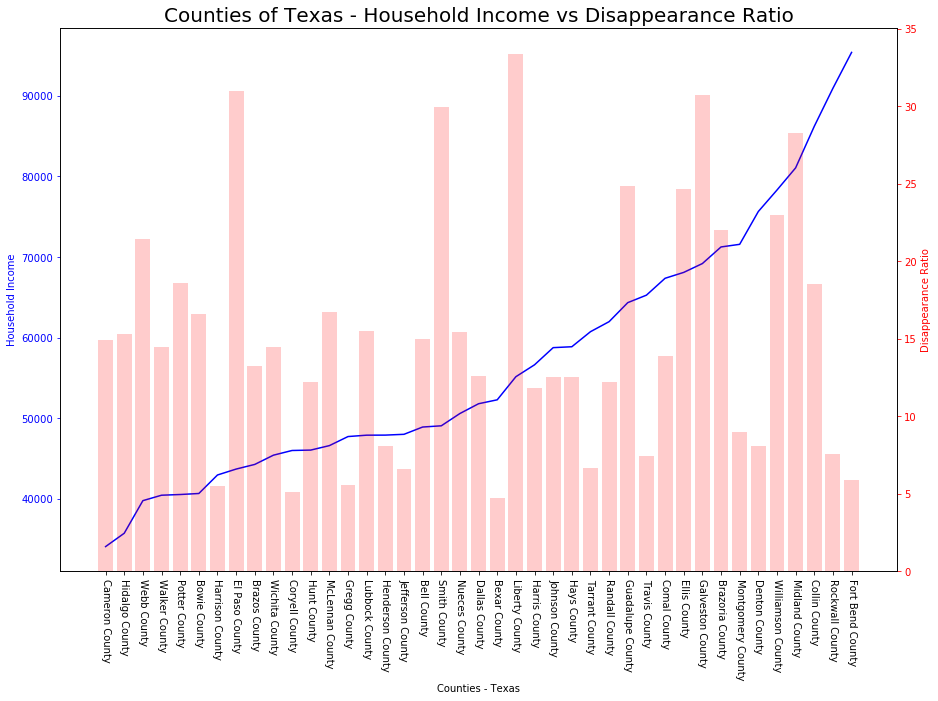

In [26]:
df_TX_Income = df_TX_final.sort_values(["Household Income"], ascending = True)

fig, ax1 = plt.subplots(figsize=(15,10))
x_axis = range(len(df_TX_Income['county_name']))
plt.xticks(x_axis, df_TX_Income['county_name'],rotation=-90)

s1 = df_TX_Income['Household Income']
ax1.plot(x_axis, s1, 'b-')
ax1.set_xlabel('Counties - Texas')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Household Income', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = df_TX_final['missing_people_ratio']
#round(df_states['Miss_Pop']/df_states['POP'] * 1000000,2)
ax2.bar(x_axis, s2,color='r',alpha=0.2)
ax2.set_ylabel('Disappearance Ratio', color='r')
ax2.tick_params('y', colors='r')

plt.title('Counties of Texas - Household Income vs Disappearance Ratio',fontsize= 20)
plt.savefig("Outputs/3a_TX_income")
plt.show()

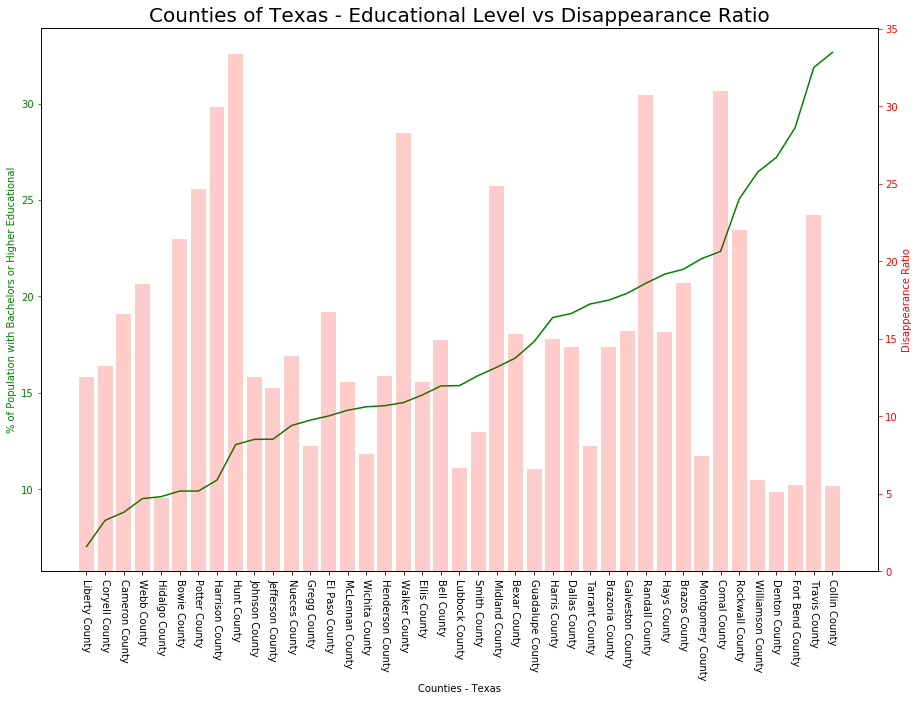

In [27]:
df_TX_Edu = df_TX_final.sort_values(["4yrs_or_higher%"], ascending = True)

fig, ax1 = plt.subplots(figsize=(15,10))
x_axis = range(len(df_TX_Edu['county_name']))
plt.xticks(x_axis, df_TX_Edu['county_name'],rotation=-90)

s1 = df_TX_Edu['4yrs_or_higher%']
ax1.plot(x_axis, s1, 'g-')
ax1.set_xlabel('Counties - Texas')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('% of Population with Bachelors or Higher Educational', color='g')
ax1.tick_params('y', colors='g')

ax2 = ax1.twinx()
s2 = df_TX_Edu['missing_people_ratio']
ax2.bar(x_axis, s2,color='r',alpha=0.2)
ax2.set_ylabel('Disappearance Ratio', color='r')
ax2.tick_params('y', colors='r')

plt.title('Counties of Texas - Educational Level vs Disappearance Ratio',fontsize= 20)
plt.savefig("Outputs/3b_TX_education")
plt.show()

In [28]:
url5 = "https://api.census.gov/data/2015/acs1?get=NAME"
varList=",B01003_001E,B19013_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,B02001_009E,B02001_010E,B06009_001E,B06009_003E,B06009_004E,B06009_005E,B06009_006E"
cond="&for=county:*&in=state:12"
reqUrl5 = url5 + varList + cond + "&key="+ cKey
getData5 = req.get(reqUrl5).json()
df_FL = pd.DataFrame(getData5, columns=getData5[0])
df_FL = df_FL.drop(df_FL.index[0])

# getIncData["Total Ethnic"] =  int (getIncData["B02001_002E"]) + int (getIncData["B02001_003E"]) +int (getIncData["B02001_004E"]) + int (getIncData["B02001_005E"]) + int (getIncData["B02001_006E"]) + int (getIncData["B02001_007E"]) + int (getIncData["B02001_008E"]) + int (getIncData["B02001_009E"]) + int (getIncData["B02001_010E"])
df_FL = df_FL.rename(columns={"B19013_001E": "Household Income", 
                                      "B01003_001E": 'Population',
                                      "B02001_002E": "Whites", 
                                      "B02001_003E": "African Americans",
                                      "B02001_004E": "American Indians",
                                      "B02001_005E": "Asians",
                                      "B02001_006E": "Pacific Islanders",
                                      "B02001_007E": "Others",
                                      "B02001_008E": "Two or More Races",
                                      "B02001_009E": "Two or More Inc Others",
                                      "B02001_010E": "Two or More Excl Others",
                                      "B06009_001E": "Education Level Overall",
                                      "B06009_002E": "Less Than High School", 
                                      "B06009_003E": "High School Grads",
                                      "B06009_004E": "Some College Degree",
                                      "B06009_005E": "Bachelors Degree",
                                      "B06009_006E": "Grad or Pro Degree",
                                      "NAME": "Count/State" })
df_FL['county_name'] = [county.split(', Florida')[0] for county in df_FL['Count/State']]
df_FL['Household Income'] = list(map(int,df_FL['Household Income']))
df_FL['Population'] = list(map(int,df_FL['Population']))
df_FL['Bachelors Degree'] = list(map(int,df_FL['Bachelors Degree']))
df_FL['Grad or Pro Degree'] = list(map(int,df_FL['Grad or Pro Degree']))

In [29]:
df_NCMEC_FL = df_NCMEC.loc[df_NCMEC['missing_state']=='Florida']
df_FL_Missing = pd.DataFrame(df_NCMEC_FL.groupby('missing_county').count()['name']).reset_index()
df_FL_Missing.columns = ['county_name','missing_people']
df_FL_final = df_FL.merge(df_FL_Missing, on='county_name')
df_FL_final['4yrs_or_higher%'] = round((df_FL_final['Bachelors Degree'] + df_FL_final['Grad or Pro Degree'])/df_FL_final['Population']*100,2)
df_FL_final['missing_people_ratio'] = round(df_FL_final['missing_people']/df_FL_final['Population']*1000000,2)
df_FL_final

,Count/State,Population,Household Income,Whites,African Americans,American Indians,Asians,Pacific Islanders,Others,Two or More Races,...,High School Grads,Some College Degree,Bachelors Degree,Grad or Pro Degree,state,county,county_name,missing_people,4yrs_or_higher%,missing_people_ratio
0,"Alachua County, Florida",259964,47895,182337,51528,1124,16280,136,1369,7190,...,33392,42778,36023,32932,12,001,Alachua County,7,26.52,26.93
1,"Bay County, Florida",181635,48259,148553,20346,509,4365,0,888,6974,...,38826,45092,18672,10455,12,005,Bay County,3,16.04,16.52
2,"Brevard County, Florida",568088,50416,471430,57147,1984,12952,995,6879,16701,...,123546,141683,72438,46147,12,009,Brevard County,5,20.87,8.80
3,"Broward County, Florida",1896425,53926,1162981,540465,3816,67759,988,63647,56769,...,364943,381596,275221,154235,12,011,Broward County,44,22.65,23.20
4,"Charlotte County, Florida",173115,45492,155857,9820,799,2183,0,746,3710,...,55158,43695,18561,11242,12,015,Charlotte County,1,17.22,5.78
5,"Clay County, Florida",203967,58676,164663,21303,254,6792,340,2783,7832,...,44542,46823,23245,9572,12,019,Clay County,1,16.09,4.90
6,"Collier County, Florida",357305,62126,319302,25156,725,4034,0,3191,4897,...,69969,68513,57501,36942,12,021,Collier County,10,26.43,27.99
7,"Duval County, Florida",913010,49554,557785,270079,1327,42063,1121,9770,30865,...,171296,199559,121472,58088,12,031,Duval County,12,19.67,13.14
8,"Escambia County, Florida",311003,46001,212859,65122,836,7825,296,4566,19499,...,58646,78692,33796,18375,12,033,Escambia County,5,16.78,16.08
9,"Hillsborough County, Florida",1349050,51725,945613,223120,3641,52592,875,78218,44991,...,238276,269822,187657,108245,12,057,Hillsborough County,25,21.93,18.53


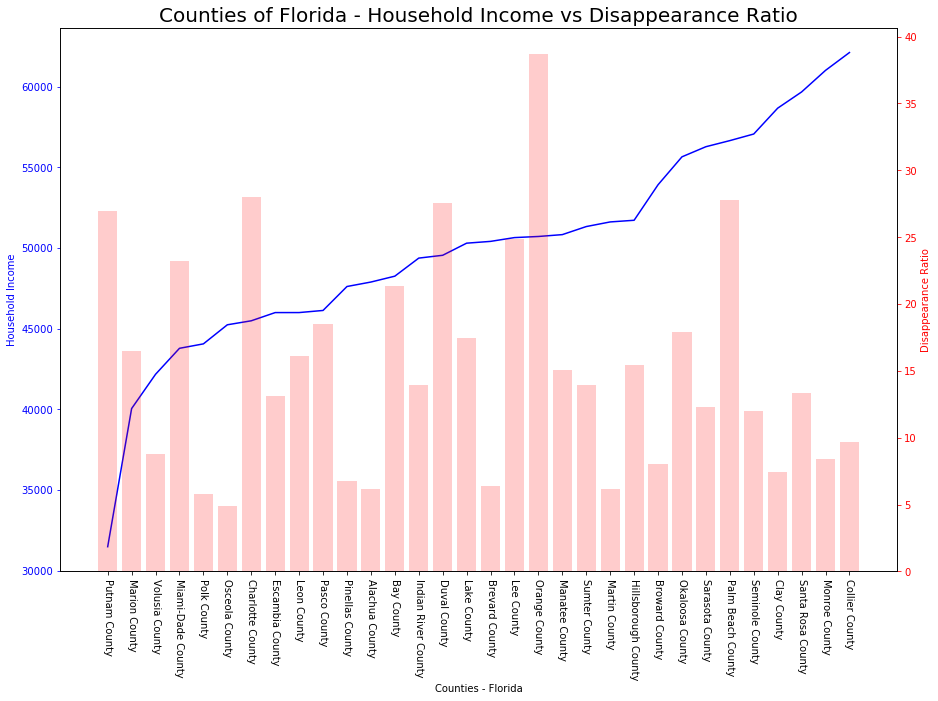

In [30]:
df_FL_Income = df_FL_final.sort_values(["Household Income"], ascending = True)

fig, ax1 = plt.subplots(figsize=(15,10))
x_axis = range(len(df_FL_Income['county_name']))
plt.xticks(x_axis, df_FL_Income['county_name'],rotation=-90)

s1 = df_FL_Income['Household Income']
ax1.plot(x_axis, s1, 'b-')
ax1.set_xlabel('Counties - Florida')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Household Income', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = df_FL_final['missing_people_ratio']
ax2.bar(x_axis, s2,color='r',alpha=0.2)
ax2.set_ylabel('Disappearance Ratio', color='r')
ax2.tick_params('y', colors='r')

plt.title('Counties of Florida - Household Income vs Disappearance Ratio',fontsize= 20)
plt.savefig("Outputs/4a_FL_income")
plt.show()

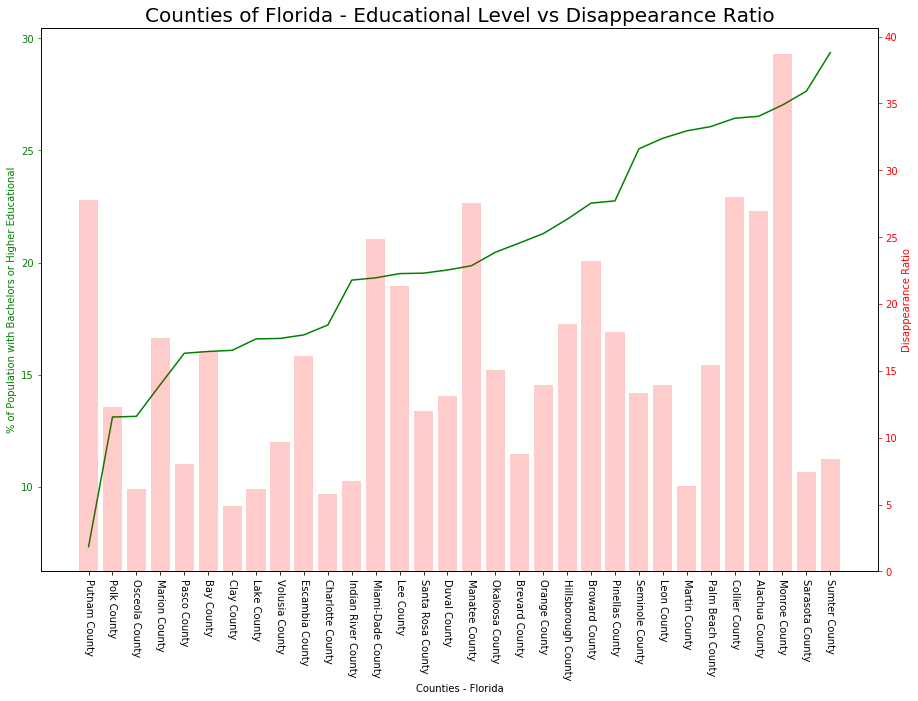

In [31]:
df_FL_Edu = df_FL_final.sort_values(["4yrs_or_higher%"], ascending = True)

fig, ax1 = plt.subplots(figsize=(15,10))
x_axis = range(len(df_FL_Edu['county_name']))
plt.xticks(x_axis, df_FL_Edu['county_name'],rotation=-90)

s1 = df_FL_Edu['4yrs_or_higher%']
ax1.plot(x_axis, s1, 'g-')
ax1.set_xlabel('Counties - Florida')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('% of Population with Bachelors or Higher Educational', color='g')
ax1.tick_params('y', colors='g')

ax2 = ax1.twinx()
s2 = df_FL_Edu['missing_people_ratio']
ax2.bar(x_axis, s2,color='r',alpha=0.2)
ax2.set_ylabel('Disappearance Ratio', color='r')
ax2.tick_params('y', colors='r')

plt.title('Counties of Florida - Educational Level vs Disappearance Ratio',fontsize= 20)
plt.savefig("Outputs/4b_FL_education")
plt.show()

In [32]:
url6 = "https://api.census.gov/data/2015/acs1?get=NAME"
varList=",B01003_001E,B19013_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,B02001_009E,B02001_010E,B06009_001E,B06009_003E,B06009_004E,B06009_005E,B06009_006E"
cond="&for=county:*&in=state:36"
reqUrl6 = url6 + varList + cond + "&key="+ cKey
getData6 = req.get(reqUrl6).json()
df_NY = pd.DataFrame(getData6, columns=getData6[0])
df_NY = df_NY.drop(df_NY.index[0])

# getIncData["Total Ethnic"] =  int (getIncData["B02001_002E"]) + int (getIncData["B02001_003E"]) +int (getIncData["B02001_004E"]) + int (getIncData["B02001_005E"]) + int (getIncData["B02001_006E"]) + int (getIncData["B02001_007E"]) + int (getIncData["B02001_008E"]) + int (getIncData["B02001_009E"]) + int (getIncData["B02001_010E"])
df_NY = df_NY.rename(columns={"B19013_001E": "Household Income", 
                                      "B01003_001E": 'Population',
                                      "B02001_002E": "Whites", 
                                      "B02001_003E": "African Americans",
                                      "B02001_004E": "American Indians",
                                      "B02001_005E": "Asians",
                                      "B02001_006E": "Pacific Islanders",
                                      "B02001_007E": "Others",
                                      "B02001_008E": "Two or More Races",
                                      "B02001_009E": "Two or More Inc Others",
                                      "B02001_010E": "Two or More Excl Others",
                                      "B06009_001E": "Education Level Overall",
                                      "B06009_002E": "Less Than High School", 
                                      "B06009_003E": "High School Grads",
                                      "B06009_004E": "Some College Degree",
                                      "B06009_005E": "Bachelors Degree",
                                      "B06009_006E": "Grad or Pro Degree",
                                      "NAME": "Count/State" })
df_NY['county_name'] = [county.split(', New York')[0] for county in df_NY['Count/State']]
df_NY['Household Income'] = list(map(int,df_NY['Household Income']))
df_NY['Population'] = list(map(int,df_NY['Population']))
df_NY['Bachelors Degree'] = list(map(int,df_NY['Bachelors Degree']))
df_NY['Grad or Pro Degree'] = list(map(int,df_NY['Grad or Pro Degree']))
df_NY

,Count/State,Population,Household Income,Whites,African Americans,American Indians,Asians,Pacific Islanders,Others,Two or More Races,Two or More Inc Others,Two or More Excl Others,Education Level Overall,High School Grads,Some College Degree,Bachelors Degree,Grad or Pro Degree,state,county,county_name
1,"Albany County, New York",309381,57042,237074,36840,613,19602,325,4000,10927,605,10322,205644,51729,59544,40903,37027,36,001,Albany County
2,"Bronx County, New York",1455444,35176,296739,475704,9275,53593,63,567160,52910,20583,32327,925619,255555,219346,122969,61292,36,005,Bronx County
3,"Broome County, New York",196567,46152,169170,11374,335,8411,107,1745,5425,222,5203,130226,40370,42514,19578,16092,36,007,Broome County
4,"Cattaraugus County, New York",77922,40016,71494,1389,2286,791,0,507,1455,61,1394,53105,21879,15186,5421,3527,36,009,Cattaraugus County
5,"Cayuga County, New York",78288,53146,72240,3663,107,248,0,405,1625,38,1587,55099,18116,18574,6774,5392,36,011,Cayuga County
6,"Chautauqua County, New York",130779,44460,121646,3224,755,844,142,2033,2135,252,1883,89955,32567,28068,11065,7619,36,013,Chautauqua County
7,"Chemung County, New York",87071,53119,76618,6638,180,927,28,630,2050,33,2017,60894,21543,19108,7729,7022,36,015,Chemung County
8,"Clinton County, New York",81251,45377,74541,3815,49,1268,10,670,898,280,618,55316,19316,17013,5225,5207,36,019,Clinton County
9,"Dutchess County, New York",295754,71864,228378,31237,799,11505,259,14671,8905,2006,6899,204122,57428,59802,38158,30968,36,027,Dutchess County
10,"Erie County, New York",922578,52214,718294,126063,4275,32105,285,23033,18523,3655,14868,641966,183204,191942,116369,90477,36,029,Erie County


In [33]:
df_NCMEC_NY = df_NCMEC.loc[df_NCMEC['missing_state']=='New York']
df_NY_Missing = pd.DataFrame(df_NCMEC_NY.groupby('missing_county').count()['name']).reset_index()
df_NY_Missing.columns = ['county_name','missing_people']
df_NY_final = df_NY.merge(df_NY_Missing, on='county_name')
df_NY_final['4yrs_or_higher%'] = round((df_NY_final['Bachelors Degree'] + df_NY_final['Grad or Pro Degree'])/df_NY_final['Population']*100,2)
df_NY_final['missing_people_ratio'] = round(df_NY_final['missing_people']/df_NY_final['Population']*1000000,2)
df_NY_final

,Count/State,Population,Household Income,Whites,African Americans,American Indians,Asians,Pacific Islanders,Others,Two or More Races,...,High School Grads,Some College Degree,Bachelors Degree,Grad or Pro Degree,state,county,county_name,missing_people,4yrs_or_higher%,missing_people_ratio
0,"Albany County, New York",309381,57042,237074,36840,613,19602,325,4000,10927,...,51729,59544,40903,37027,36,001,Albany County,3,25.19,9.70
1,"Bronx County, New York",1455444,35176,296739,475704,9275,53593,63,567160,52910,...,255555,219346,122969,61292,36,005,Bronx County,10,12.66,6.87
2,"Broome County, New York",196567,46152,169170,11374,335,8411,107,1745,5425,...,40370,42514,19578,16092,36,007,Broome County,2,18.15,10.17
3,"Clinton County, New York",81251,45377,74541,3815,49,1268,10,670,898,...,19316,17013,5225,5207,36,019,Clinton County,1,12.84,12.31
4,"Dutchess County, New York",295754,71864,228378,31237,799,11505,259,14671,8905,...,57428,59802,38158,30968,36,027,Dutchess County,5,23.37,16.91
5,"Erie County, New York",922578,52214,718294,126063,4275,32105,285,23033,18523,...,183204,191942,116369,90477,36,029,Erie County,7,22.42,7.59
6,"Kings County, New York",2636735,51141,1143422,861059,10021,319263,375,234735,67860,...,455841,351748,383350,247742,36,047,Kings County,24,23.93,9.10
7,"Madison County, New York",71849,60286,68113,2015,21,489,0,89,1122,...,17118,15063,6971,4619,36,053,Madison County,2,16.13,27.84
8,"Monroe County, New York",749600,54077,570572,118054,3564,29177,99,10714,17420,...,126626,145420,106007,81230,36,055,Monroe County,11,24.98,14.67
9,"Nassau County, New York",1361350,101830,934951,161031,2675,125694,116,96174,40709,...,229550,217133,227876,183270,36,059,Nassau County,22,30.20,16.16


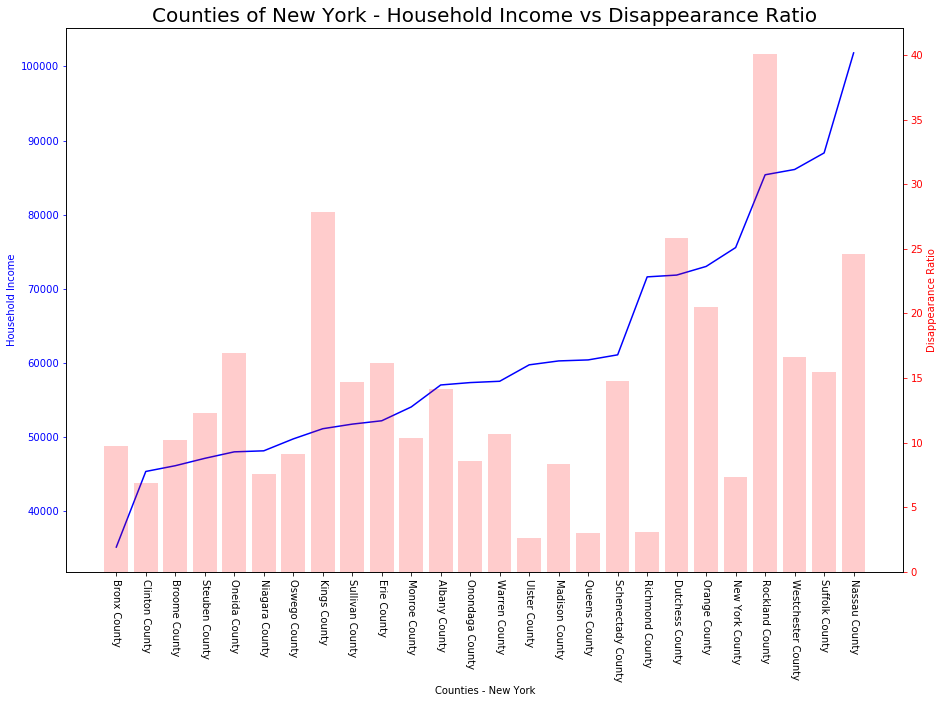

In [34]:
df_NY_Income = df_NY_final.sort_values(["Household Income"], ascending = True)

fig, ax1 = plt.subplots(figsize=(15,10))
x_axis = range(len(df_NY_Income['county_name']))
plt.xticks(x_axis, df_NY_Income['county_name'],rotation=-90)

s1 = df_NY_Income['Household Income']
ax1.plot(x_axis, s1, 'b-')
ax1.set_xlabel('Counties - New York')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Household Income', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = df_NY_final['missing_people_ratio']
#round(df_states['Miss_Pop']/df_states['POP'] * 1000000,2)
ax2.bar(x_axis, s2,color='r',alpha=0.2)
ax2.set_ylabel('Disappearance Ratio', color='r')
ax2.tick_params('y', colors='r')

plt.title('Counties of New York - Household Income vs Disappearance Ratio',fontsize= 20)
plt.savefig("Outputs/5a_NY_income")
plt.show()

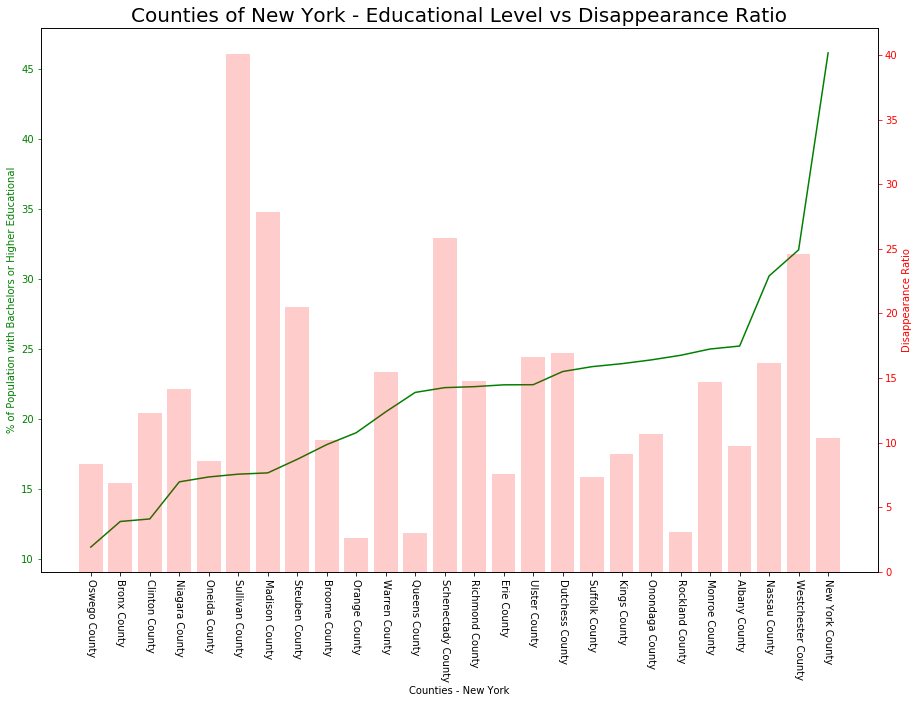

In [35]:
df_NY_Edu = df_NY_final.sort_values(["4yrs_or_higher%"], ascending = True)

fig, ax1 = plt.subplots(figsize=(15,10))
x_axis = range(len(df_NY_Edu['county_name']))
plt.xticks(x_axis, df_NY_Edu['county_name'],rotation=-90)

s1 = df_NY_Edu['4yrs_or_higher%']
ax1.plot(x_axis, s1, 'g-')
ax1.set_xlabel('Counties - New York')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('% of Population with Bachelors or Higher Educational', color='g')
ax1.tick_params('y', colors='g')

ax2 = ax1.twinx()
s2 = df_NY_Edu['missing_people_ratio']
ax2.bar(x_axis, s2,color='r',alpha=0.2)
ax2.set_ylabel('Disappearance Ratio', color='r')
ax2.tick_params('y', colors='r')

plt.title('Counties of New York - Educational Level vs Disappearance Ratio',fontsize= 20)
plt.savefig("Outputs/5b_NY_education")
plt.show()

In [36]:
url6 = "https://api.census.gov/data/2015/acs1?get=NAME"
varList=",B01003_001E,B19013_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,B02001_009E,B02001_010E,B06009_001E,B06009_003E,B06009_004E,B06009_005E,B06009_006E"
cond="&for=county:*&in=state:17"
reqUrl6 = url6 + varList + cond + "&key="+ cKey
getData6 = req.get(reqUrl6).json()
df_IL = pd.DataFrame(getData6, columns=getData6[0])
df_IL = df_IL.drop(df_IL.index[0])

# getIncData["Total Ethnic"] =  int (getIncData["B02001_002E"]) + int (getIncData["B02001_003E"]) +int (getIncData["B02001_004E"]) + int (getIncData["B02001_005E"]) + int (getIncData["B02001_006E"]) + int (getIncData["B02001_007E"]) + int (getIncData["B02001_008E"]) + int (getIncData["B02001_009E"]) + int (getIncData["B02001_010E"])
df_IL = df_IL.rename(columns={"B19013_001E": "Household Income", 
                                      "B01003_001E": 'Population',
                                      "B02001_002E": "Whites", 
                                      "B02001_003E": "African Americans",
                                      "B02001_004E": "American Indians",
                                      "B02001_005E": "Asians",
                                      "B02001_006E": "Pacific Islanders",
                                      "B02001_007E": "Others",
                                      "B02001_008E": "Two or More Races",
                                      "B02001_009E": "Two or More Inc Others",
                                      "B02001_010E": "Two or More Excl Others",
                                      "B06009_001E": "Education Level Overall",
                                      "B06009_002E": "Less Than High School", 
                                      "B06009_003E": "High School Grads",
                                      "B06009_004E": "Some College Degree",
                                      "B06009_005E": "Bachelors Degree",
                                      "B06009_006E": "Grad or Pro Degree",
                                      "NAME": "Count/State" })
df_IL['county_name'] = [county.split(', Illinois')[0] for county in df_IL['Count/State']]
df_IL['Household Income'] = list(map(int,df_IL['Household Income']))
df_IL['Population'] = list(map(int,df_IL['Population']))
df_IL['Bachelors Degree'] = list(map(int,df_IL['Bachelors Degree']))
df_IL['Grad or Pro Degree'] = list(map(int,df_IL['Grad or Pro Degree']))

In [37]:
df_NCMEC_IL = df_NCMEC.loc[df_NCMEC['missing_state']=='Illinois']
df_IL_Missing = pd.DataFrame(df_NCMEC_IL.groupby('missing_county').count()['name']).reset_index()
df_IL_Missing.columns = ['county_name','missing_people']
df_IL_final = df_IL.merge(df_IL_Missing, on='county_name')
df_IL_final['4yrs_or_higher%'] = round((df_IL_final['Bachelors Degree'] + df_IL_final['Grad or Pro Degree'])/df_IL_final['Population']*100,2)
df_IL_final['missing_people_ratio'] = round(df_IL_final['missing_people']/df_IL_final['Population']*1000000,2)
df_IL_final

,Count/State,Population,Household Income,Whites,African Americans,American Indians,Asians,Pacific Islanders,Others,Two or More Races,...,High School Grads,Some College Degree,Bachelors Degree,Grad or Pro Degree,state,county,county_name,missing_people,4yrs_or_higher%,missing_people_ratio
0,"Adams County, Illinois",67013,46528,62245,2316,448,677,18,0,1309,...,17866,15445,5771,3824,17,001,Adams County,1,14.32,14.92
1,"Champaign County, Illinois",208861,50252,150037,26513,277,22294,409,4064,5267,...,27115,32324,26409,28607,17,019,Champaign County,2,26.34,9.58
2,"Cook County, Illinois",5238216,56851,2951389,1239299,14702,368205,2413,534180,128028,...,854288,922579,790748,515549,17,031,Cook County,65,24.94,12.41
3,"DuPage County, Illinois",933736,81559,729248,45855,2979,106949,285,26906,21514,...,118962,174445,172558,117994,17,043,DuPage County,1,31.12,1.07
4,"Kane County, Illinois",530847,70359,388540,31482,993,21060,171,77720,10881,...,76613,99725,68417,38023,17,089,Kane County,3,20.05,5.65
5,"Kankakee County, Illinois",110879,53850,87939,17543,81,1267,85,2471,1493,...,24572,23277,9542,5608,17,091,Kankakee County,1,13.66,9.02
6,"Lake County, Illinois",703910,82113,563399,48996,1053,50634,127,20328,19373,...,97390,111951,118173,83259,17,097,Lake County,6,28.62,8.52
7,"Macon County, Illinois",107303,48040,82873,15646,157,981,0,1522,6124,...,25219,23008,11873,5268,17,115,Macon County,3,15.97,27.96
8,"Peoria County, Illinois",186221,53837,135122,32746,326,7155,56,3847,6969,...,33641,41016,22533,14734,17,143,Peoria County,3,20.01,16.11
9,"St. Clair County, Illinois",264052,50347,171465,78890,446,3683,114,2251,7203,...,48725,63977,29036,18355,17,163,St. Clair County,1,17.95,3.79


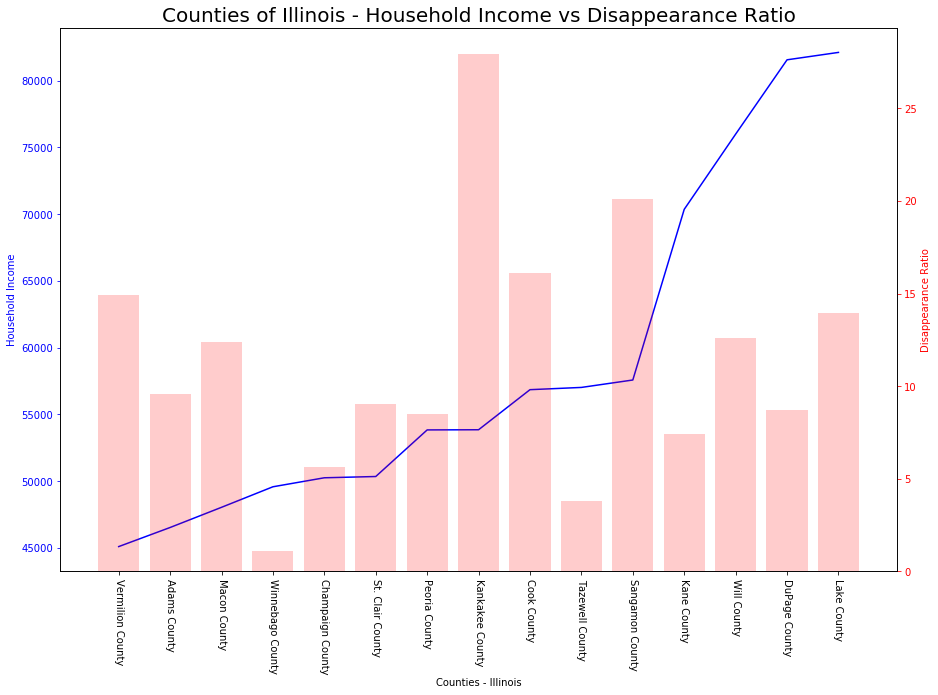

In [38]:
df_IL_Income = df_IL_final.sort_values(["Household Income"], ascending = True)

fig, ax1 = plt.subplots(figsize=(15,10))
x_axis = range(len(df_IL_Income['county_name']))
plt.xticks(x_axis, df_IL_Income['county_name'],rotation=-90)

s1 = df_IL_Income['Household Income']
ax1.plot(x_axis, s1, 'b-')
ax1.set_xlabel('Counties - Illinois')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Household Income', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = df_IL_final['missing_people_ratio']
#round(df_states['Miss_Pop']/df_states['POP'] * 1000000,2)
ax2.bar(x_axis, s2,color='r',alpha=0.2)
ax2.set_ylabel('Disappearance Ratio', color='r')
ax2.tick_params('y', colors='r')

plt.title('Counties of Illinois - Household Income vs Disappearance Ratio',fontsize= 20)
plt.savefig("Outputs/6a_IL_income")
plt.show()

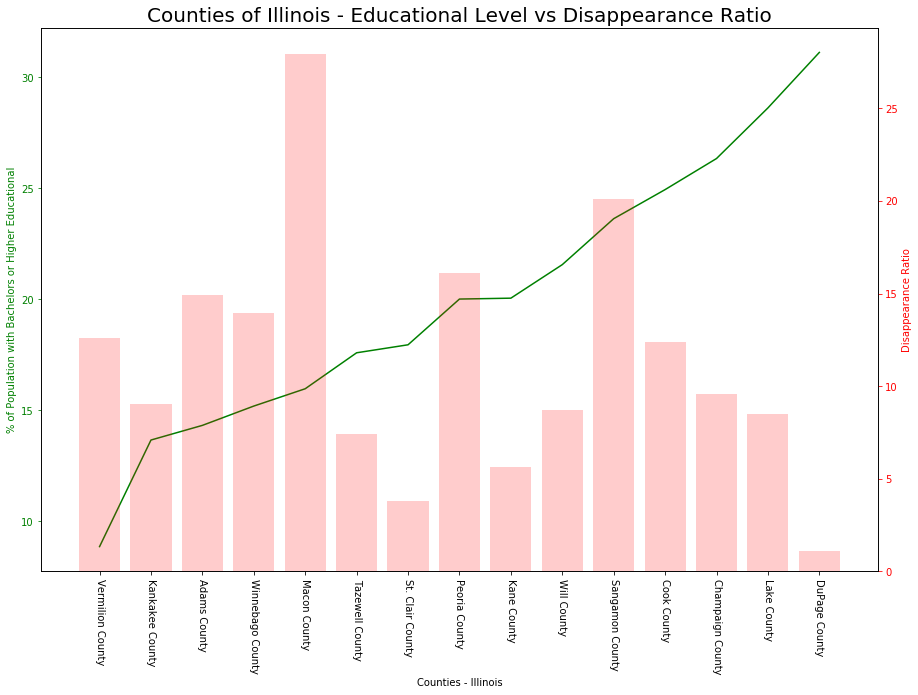

In [39]:
df_IL_Edu = df_IL_final.sort_values(["4yrs_or_higher%"], ascending = True)

fig, ax1 = plt.subplots(figsize=(15,10))
x_axis = range(len(df_IL_Edu['county_name']))
plt.xticks(x_axis, df_IL_Edu['county_name'],rotation=-90)

s1 = df_IL_Edu['4yrs_or_higher%']
ax1.plot(x_axis, s1, 'g-')
ax1.set_xlabel('Counties - Illinois')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('% of Population with Bachelors or Higher Educational', color='g')
ax1.tick_params('y', colors='g')

ax2 = ax1.twinx()
s2 = df_IL_Edu['missing_people_ratio']
ax2.bar(x_axis, s2,color='r',alpha=0.2)
ax2.set_ylabel('Disappearance Ratio', color='r')
ax2.tick_params('y', colors='r')

plt.title('Counties of Illinois - Educational Level vs Disappearance Ratio',fontsize= 20)
plt.savefig("Outputs/6b_IL_education")
plt.show()

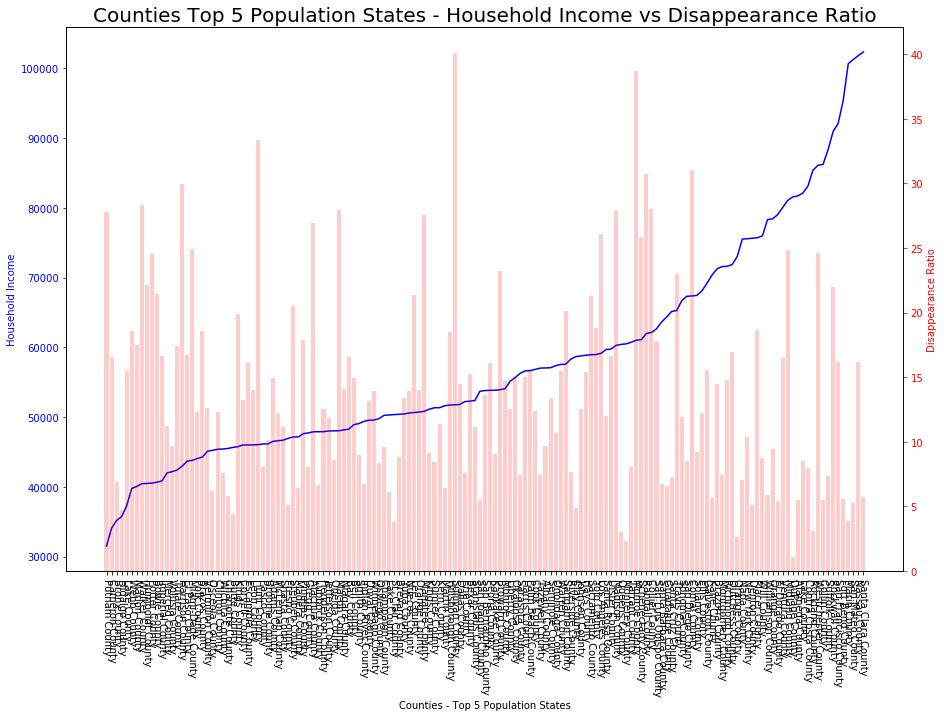

In [40]:
Incomes = [df_CA_Income, df_TX_Income, df_FL_Income, df_NY_Income, df_IL_Income]
df_Incomes = pd.concat(Incomes)
df_Incomes = df_Incomes.sort_values(["Household Income"], ascending = True)

fig, ax1 = plt.subplots(figsize=(15,10))
x_axis = range(len(df_Incomes['county_name']))
plt.xticks(x_axis, df_Incomes['county_name'],rotation=-90)

s1 = df_Incomes['Household Income']
ax1.plot(x_axis, s1, 'b-')
ax1.set_xlabel('Counties - Top 5 Population States')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Household Income', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = df_Incomes['missing_people_ratio']
ax2.bar(x_axis, s2,color='r',alpha=0.2)
ax2.set_ylabel('Disappearance Ratio', color='r')
ax2.tick_params('y', colors='r')


plt.title('Counties Top 5 Population States - Household Income vs Disappearance Ratio',fontsize= 20)
plt.savefig("Outputs/7_Incomes")
plt.show()

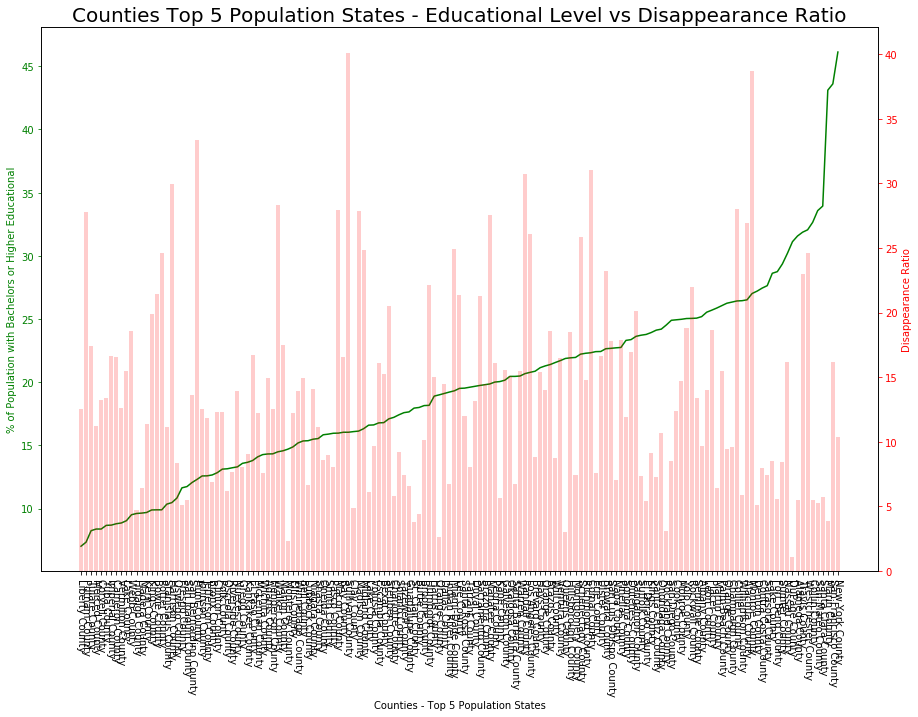

In [41]:
Education = [df_CA_Edu, df_TX_Edu, df_FL_Edu, df_NY_Edu, df_IL_Edu]
df_Education = pd.concat(Education)
df_Education = df_Education.sort_values(["4yrs_or_higher%"], ascending = True)

fig, ax1 = plt.subplots(figsize=(15,10))
x_axis = range(len(df_Education['county_name']))
plt.xticks(x_axis, df_Education['county_name'],rotation=-90)

s1 = df_Education['4yrs_or_higher%']
ax1.plot(x_axis, s1, 'g-')
ax1.set_xlabel('Counties - Top 5 Population States')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('% of Population with Bachelors or Higher Educational', color='g')
ax1.tick_params('y', colors='g')

ax2 = ax1.twinx()
s2 = df_Education['missing_people_ratio']
ax2.bar(x_axis, s2,color='r',alpha=0.2)
ax2.set_ylabel('Disappearance Ratio', color='r')
ax2.tick_params('y', colors='r')

plt.title('Counties Top 5 Population States - Educational Level vs Disappearance Ratio',fontsize= 20)
plt.savefig("Outputs/8_Education")
plt.show()

In [42]:
fivestates = [df_NCMEC_CA, df_NCMEC_TX, df_NCMEC_FL, df_NCMEC_NY, df_NCMEC_IL]
df_5states = pd.concat(fivestates)
df_5states = pd.DataFrame(df_5states.groupby(['missing_county','case_type']).count()['name'])
df_5states = df_5states.reset_index()
df_abduct = df_5states.loc[df_5states['case_type'] == 'abduct']
df_abduct.columns = ['county_name','ayy','abduct']
df_abduct = df_abduct.drop('ayy', 1)
df_missing = df_5states.loc[df_5states['case_type'] == 'missing']
df_missing.columns = ['county_name','ayy','missing']
df_missing = df_missing.drop('ayy', 1)
df_runaway = df_5states.loc[df_5states['case_type'] == 'runaway']
df_runaway.columns = ['county_name','ayy','runaway']
df_runaway = df_runaway.drop('ayy', 1)
df_5states_temp = df_Incomes.sort_values(["county_name"], ascending = True)
df_5states_temp = df_5states_temp[['county_name','Population','Household Income','4yrs_or_higher%']]
df_5states_temp = df_5states_temp.reset_index().drop('index',1)

df_5states_final = pd.DataFrame(columns=['abduct','missing','runaway'])
df_5states_final['county_name'] = df_5states_temp['county_name']
df_5states_final['Pop'] = df_5states_temp['Population']
df_5states_final['Income'] = df_5states_temp['Household Income']
df_5states_final['4yrs_or_higher%'] = df_5states_temp['4yrs_or_higher%']
df_5states_final = df_5states_final.set_index('county_name')

for county in list(df_5states_final.index):
    try:
        df_5states_final.set_value(county,'abduct',df_abduct.loc[df_abduct['county_name'] == county]['abduct'].item())
    except:
        pass
    try:
        df_5states_final.set_value(county,'missing',df_missing.loc[df_missing['county_name'] == county]['missing'].item())
    except:
        pass
    try:
        df_5states_final.set_value(county,'runaway',df_runaway.loc[df_runaway['county_name'] == county]['runaway'].item())
    except:
        pass

df_5states_final = df_5states_final.fillna(0).reset_index()
df_5states_final.head()

,county_name,abduct,missing,runaway,Pop,Income,4yrs_or_higher%
0,Adams County,0,0,1,67013,46528,14.32
1,Alachua County,2,1,4,259964,47895,26.52
2,Alameda County,1,5,3,1638215,81717,31.57
3,Albany County,1,1,1,309381,57042,25.19
4,Bay County,0,0,3,181635,48259,16.04


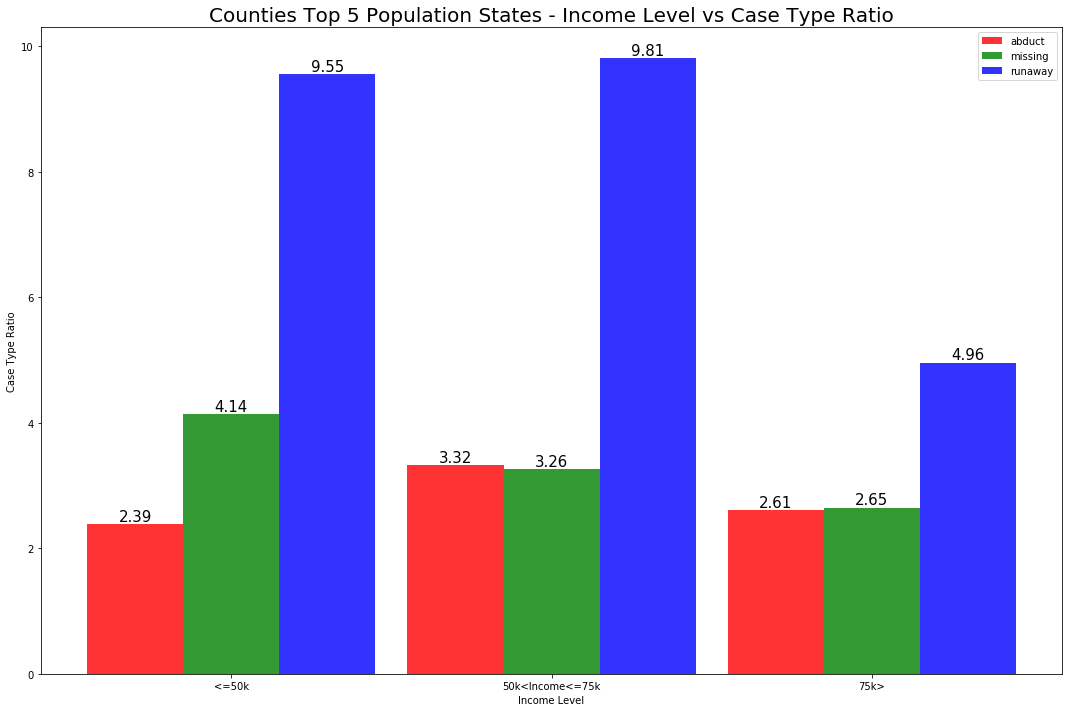

In [43]:
df_Incomes_low = df_5states_final.sort_values(["Income"], ascending = True).loc[df_5states_final['Income'] <= 50000]
df_Incomes_mid = df_5states_final.sort_values(["Income"], ascending = True).loc[(df_5states_final['Income'] > 50000) & (df_5states_final['Income'] <= 75000)]
df_Incomes_high = df_5states_final.sort_values(["Income"], ascending = True).loc[df_5states_final['Income'] > 75000]

df_Incomes_Case = pd.DataFrame({'abduct':[round(df_Incomes_low['abduct'].sum()/df_Incomes_low['Pop'].sum()*1000000,2),round(df_Incomes_mid['abduct'].sum()/df_Incomes_mid['Pop'].sum()*1000000,2),round(df_Incomes_high['abduct'].sum()/df_Incomes_high['Pop'].sum()*1000000,2)],
                                'missing':[round(df_Incomes_low['missing'].sum()/df_Incomes_low['Pop'].sum()*1000000,2),round(df_Incomes_mid['missing'].sum()/df_Incomes_mid['Pop'].sum()*1000000,2),round(df_Incomes_high['missing'].sum()/df_Incomes_high['Pop'].sum()*1000000,2)],
                                'runaway':[round(df_Incomes_low['runaway'].sum()/df_Incomes_low['Pop'].sum()*1000000,2),round(df_Incomes_mid['runaway'].sum()/df_Incomes_mid['Pop'].sum()*1000000,2),round(df_Incomes_high['runaway'].sum()/df_Incomes_high['Pop'].sum()*1000000,2)]},
                                index=['<=50k','50k<Income<=75k','75k>']) 

fig, ax = plt.subplots(figsize=(15,10))
index = np.arange(len(df_Incomes_Case))
width = 0.3

rects1 = plt.bar(index, list(df_Incomes_Case['abduct']), width,color='r',label='abduct',alpha=0.8)
rects2 = plt.bar(index+width, list(df_Incomes_Case['missing']), width,color='g',label='missing',alpha=0.8)
rects3 = plt.bar(index+2*width, list(df_Incomes_Case['runaway']), width,color='b',label='runaway',alpha=0.8)

for rect in rects1+rects2+rects3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '{}'.format(float(height)) , ha='center', va='bottom',fontsize= 15)

plt.xlabel('Income Level')
plt.ylabel('Case Type Ratio')
plt.title('Counties Top 5 Population States - Income Level vs Case Type Ratio',fontsize= 20)
plt.xticks(index+width, ('<=50k','50k<Income<=75k','75k>'))
plt.legend(loc='best')
 
plt.tight_layout()
plt.savefig("Outputs/9_Incomes")
plt.show()

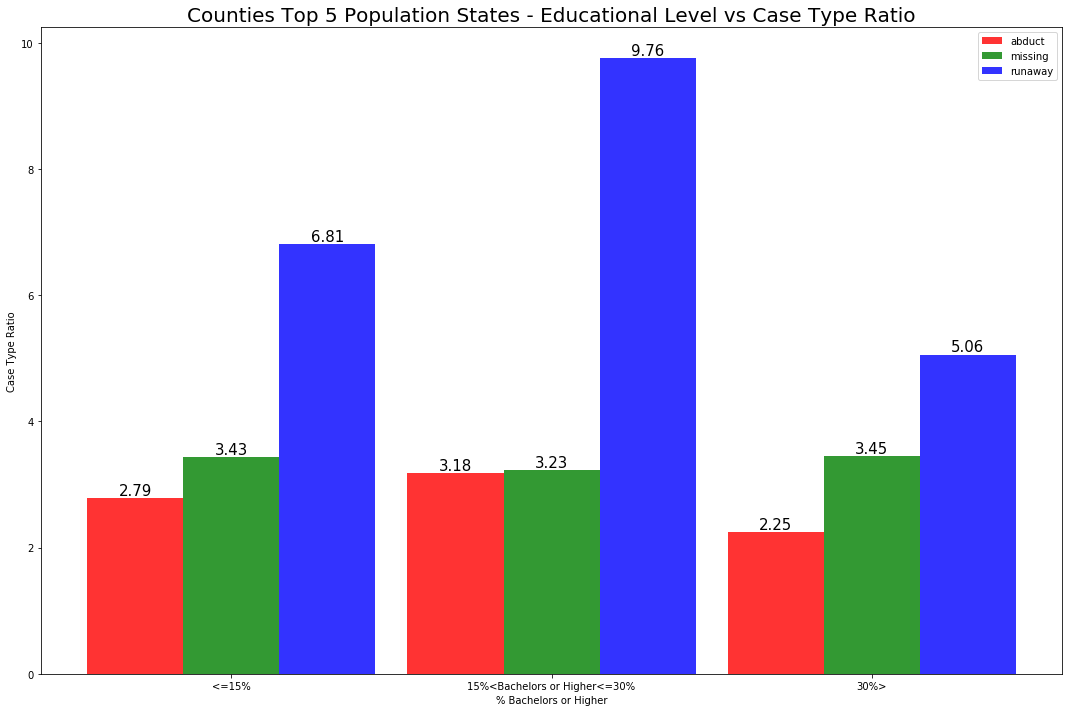

In [44]:
df_Edu_low = df_5states_final.sort_values(["4yrs_or_higher%"], ascending = True).loc[df_5states_final['4yrs_or_higher%'] <= 15]
df_Edu_mid = df_5states_final.sort_values(["4yrs_or_higher%"], ascending = True).loc[(df_5states_final['4yrs_or_higher%'] > 15) & (df_5states_final['4yrs_or_higher%'] <= 30)]
df_Edu_high = df_5states_final.sort_values(["4yrs_or_higher%"], ascending = True).loc[df_5states_final['4yrs_or_higher%'] > 30]

df_Edu_Case = pd.DataFrame({'abduct':[round(df_Edu_low['abduct'].sum()/df_Edu_low['Pop'].sum()*1000000,2),round(df_Edu_mid['abduct'].sum()/df_Edu_mid['Pop'].sum()*1000000,2),round(df_Edu_high['abduct'].sum()/df_Edu_high['Pop'].sum()*1000000,2)],
                            'missing':[round(df_Edu_low['missing'].sum()/df_Edu_low['Pop'].sum()*1000000,2),round(df_Edu_mid['missing'].sum()/df_Edu_mid['Pop'].sum()*1000000,2),round(df_Edu_high['missing'].sum()/df_Edu_high['Pop'].sum()*1000000,2)],
                            'runaway':[round(df_Edu_low['runaway'].sum()/df_Edu_low['Pop'].sum()*1000000,2),round(df_Edu_mid['runaway'].sum()/df_Edu_mid['Pop'].sum()*1000000,2),round(df_Edu_high['runaway'].sum()/df_Edu_high['Pop'].sum()*1000000,2)]},
                            index=['<=15%','15%<Income<=30%','30%>']) 

fig, ax = plt.subplots(figsize=(15,10))
index = np.arange(len(df_Edu_Case))
width = 0.3

rects1 = plt.bar(index, list(df_Edu_Case['abduct']), width,color='r',label='abduct',alpha=0.8)
rects2 = plt.bar(index+width, list(df_Edu_Case['missing']), width,color='g',label='missing',alpha=0.8)
rects3 = plt.bar(index+2*width, list(df_Edu_Case['runaway']), width,color='b',label='runaway',alpha=0.8)

for rect in rects1+rects2+rects3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '{}'.format(float(height)) , ha='center', va='bottom',fontsize= 15)

plt.xlabel('% Bachelors or Higher')
plt.ylabel('Case Type Ratio')
plt.title('Counties Top 5 Population States - Educational Level vs Case Type Ratio',fontsize= 20)
plt.xticks(index+width, ('<=15%','15%<Bachelors or Higher<=30%','30%>'))
plt.legend(loc='best')
 
plt.tight_layout()
plt.savefig("Outputs/10_Education")
plt.show()